Import necessary packages for this analysis

In [1]:
import yfinance as yf
import pandas as pd
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

Use yFinance to download historical stock data for the portfolio

In [ ]:
import pandas as pd
import yfinance as yf

# Set the start and end dates for the historical data
start_date = "2020-01-01"
end_date = "2024-12-31"

# Dictionary of stocks with their corresponding number of shares
stock_positions = {
    # Individual 4272
    "AXP": 6224,
    "NFLX": 100,
    "FSLR": 400,
    "CVX": 400,
    "TER": 400,
    "VRTX": 100,
    "TEL": 300,
    "DYNF": 800,
    "PDBC": 3000,
    "PYPL": 400,
    "BOCT": 2500,
    # Individual 3860
    "SNOW": 800,
    "META": 300,
    "QQQ": 600,
    "RSP": 200,
    # Trust 7225
    "GOOG": 6000,
    "AAPL": 3300,
    "FXAIX": 5370,
    "HACAX": 4504,
    "GFAFX": 6444,
    "NOW": 200,
    "VEA": 4700,
    "MSFT": 600,
    "FIGFX": 11770,
    "QCOM": 1000,
    "PHSTX": 2218,
    "FLPSX": 3022,
    "UNH": 400,
    "XLV": 700,
    "CRM": 200,
    "ITA": 400,
    "CSCO": 800,
    "IVOV": 298,
    # ROTH 8250
    "FDSCX": 1978,
    "PMAY": 2000,
    "FSPGX": 1548,
    "ASVIX": 5225,
    "XDQQ": 1400,
    "JAENX": 523,
    # IRA 8269
    "FIVFX": 7255,
    "JHEQX": 5433,
    "AMGN": 400,
    "GQRPX": 4873,
    "JEPI": 1300,
    "PFXF": 3000,
    "XDAP": 1400,
    "JPM": 200,
    "XBAP": 1000,
    "GQGPX": 1957,
    "SPYI": 600,
    "HRVIX": 723,
    # Other
    "SPY": 100
}

# Generate a date range for the positions and localize to UTC
dates = pd.date_range(start=start_date, end=end_date, freq='B', tz='UTC')  # Business days

# Download historical data for the stocks
tickers = list(stock_positions.keys())
data = yf.download(tickers, start=start_date, end=end_date)

# Localize the data index to UTC
data.index = data.index.tz_convert('UTC')

# Reindex the data to match the date range and fill missing values
data = data.reindex(dates).fillna(method='ffill').fillna(method='bfill')

# Create an empty DataFrame with the date range as the index and stock symbols as columns
positions = pd.DataFrame(index=dates, columns=stock_positions.keys())

# Get the daily_close prices for each stock
daily_close = data['Adj Close']

# Populate the DataFrame with the net position values for each stock in the portfolio
for stock, shares in stock_positions.items():
    positions[stock] = shares * daily_close[stock]

# Add a 'cash' column with 0 values
positions['cash'] = 0


# Calculate daily portfolio returns as a percentage
portfolio_returns = positions.sum(axis=1).pct_change().dropna()

# Display the DataFrame
print(portfolio_returns)



[*********************100%***********************]  17 of 17 completed

2020-01-02 00:00:00+00:00    0.000000
2020-01-03 00:00:00+00:00   -0.007639
2020-01-06 00:00:00+00:00    0.012698
2020-01-07 00:00:00+00:00   -0.002857
2020-01-08 00:00:00+00:00    0.010955
                               ...   
2024-12-25 00:00:00+00:00    0.000000
2024-12-26 00:00:00+00:00    0.000000
2024-12-27 00:00:00+00:00    0.000000
2024-12-30 00:00:00+00:00    0.000000
2024-12-31 00:00:00+00:00    0.000000
Freq: B, Length: 1304, dtype: float64


In [10]:

returns = data["Adj Close"].pct_change().dropna()
benchmark_rets = returns.pop("SPY")
print(benchmark_rets)

2020-01-02 00:00:00+00:00    0.000000
2020-01-03 00:00:00+00:00   -0.007572
2020-01-06 00:00:00+00:00    0.003815
2020-01-07 00:00:00+00:00   -0.002812
2020-01-08 00:00:00+00:00    0.005329
                               ...   
2024-12-25 00:00:00+00:00    0.000000
2024-12-26 00:00:00+00:00    0.000000
2024-12-27 00:00:00+00:00    0.000000
2024-12-30 00:00:00+00:00    0.000000
2024-12-31 00:00:00+00:00    0.000000
Freq: B, Name: SPY, Length: 1304, dtype: float64


Generate a detailed portfolio analysis with PyFolio

Start date,2020-01-02
End date,2024-12-31
Total months,62
,Backtest
Annual return,16.985%
Cumulative returns,125.191%
Annual volatility,22.582%
Sharpe ratio,0.81
Calmar ratio,0.61
Stability,0.70
Max drawdown,-27.91%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.91,2021-12-27,2022-06-16,2023-12-13,513
1,27.61,2020-02-19,2020-03-23,2020-06-02,75
2,12.30,2020-09-02,2020-09-23,2020-12-01,65
3,8.06,2024-07-10,2024-08-07,2024-10-11,68
4,6.95,2021-02-15,2021-03-08,2021-04-05,36


Stress Events,mean,min,max
Covid,0.07%,-11.62%,9.24%


Top 10 long positions of all time,max
GOOG,26.86%
UNH,18.50%
SPY,16.14%
AMGN,10.65%
NFLX,9.23%
MSFT,7.77%
VRTX,7.58%
NOW,7.38%
META,6.83%
PYPL,6.40%


Top 10 short positions of all time,max


Top 10 positions of all time,max
GOOG,26.86%
UNH,18.50%
SPY,16.14%
AMGN,10.65%
NFLX,9.23%
MSFT,7.77%
VRTX,7.58%
NOW,7.38%
META,6.83%
PYPL,6.40%


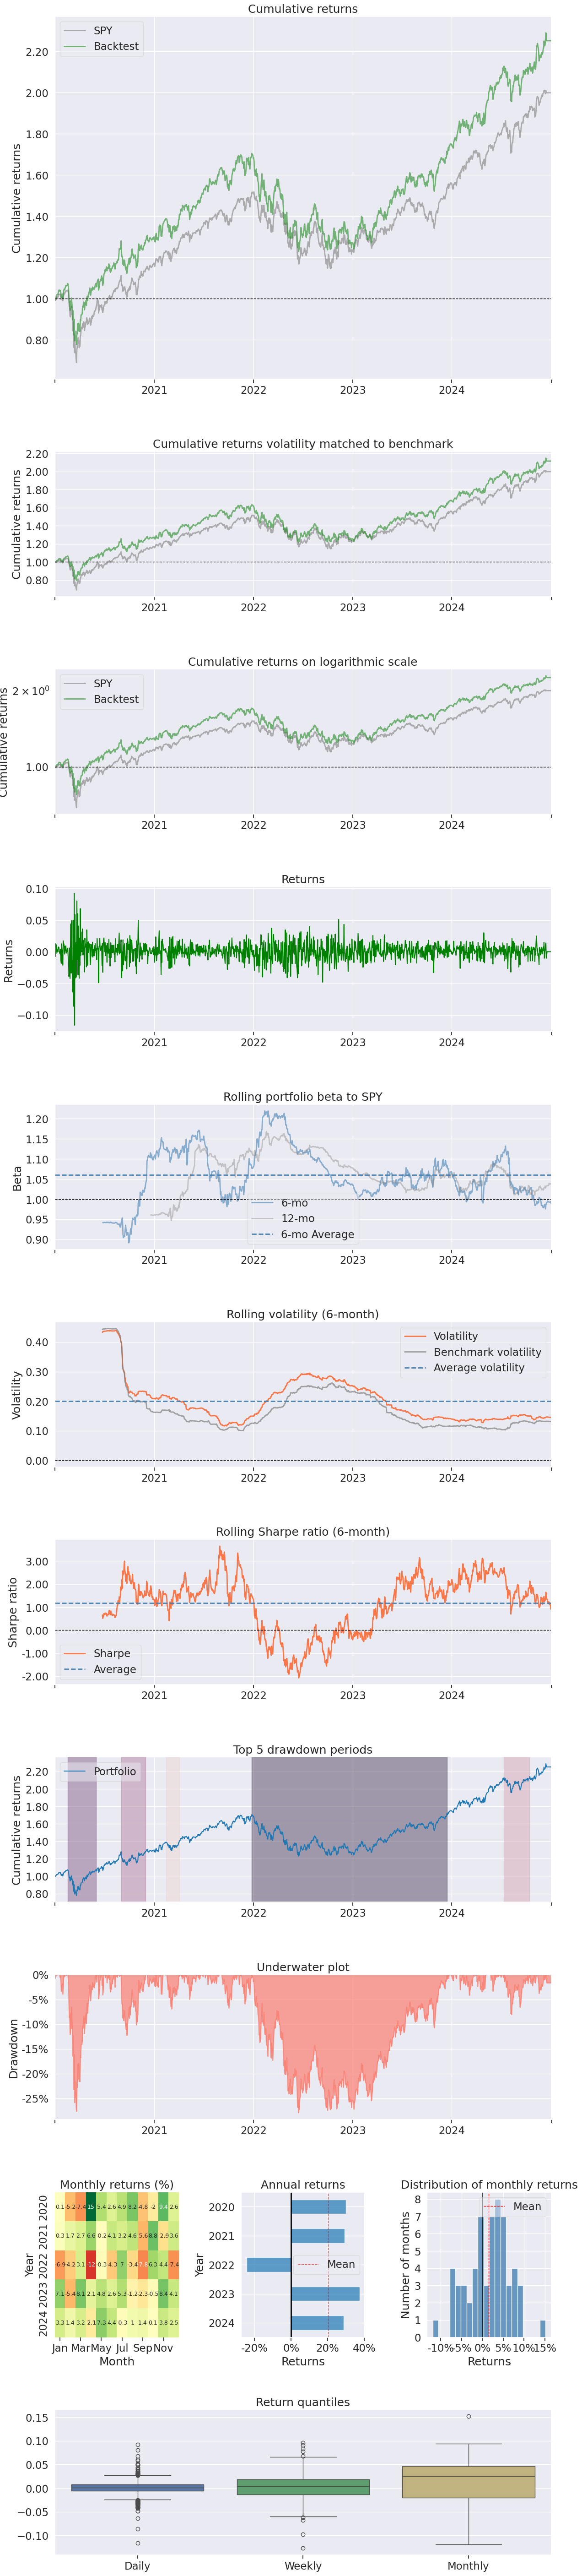

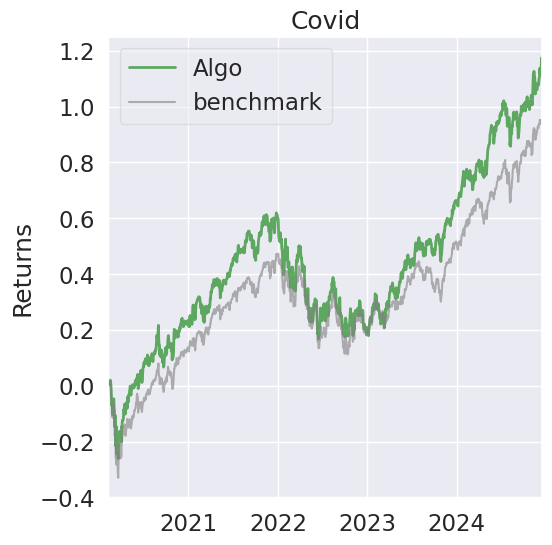

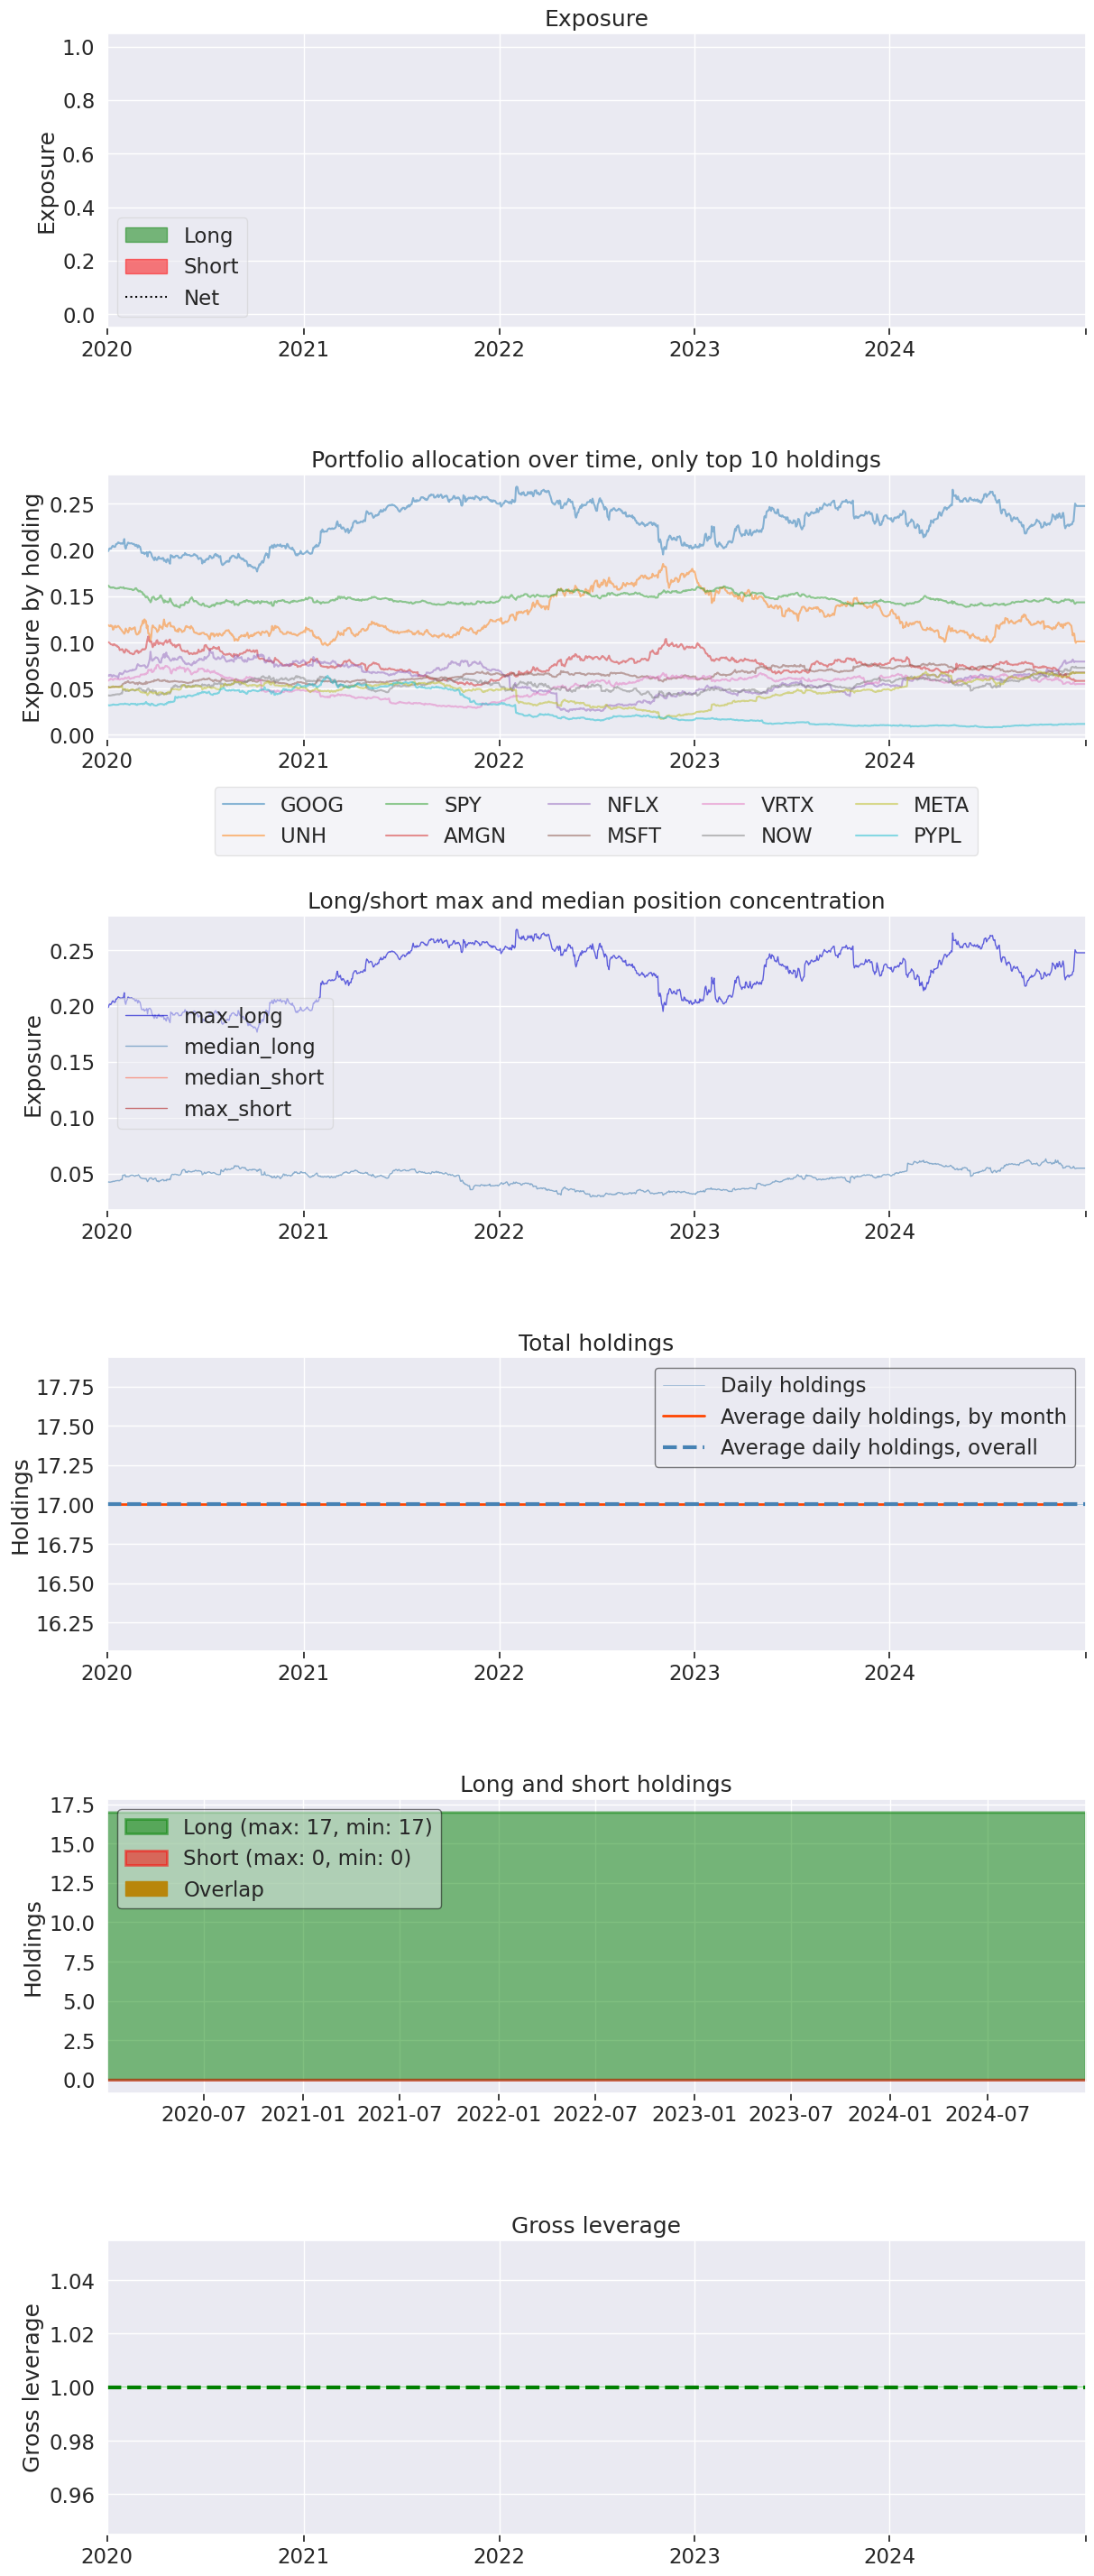

In [11]:
pf.create_full_tear_sheet(
    portfolio_returns,
    positions=positions,
    benchmark_rets=benchmark_rets
)